# Requirements for assignment 1

1. Frame the problem and look at the big picture
2. Get the data
3. Explore the data to gain insights
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms
5. Explore many different models and short-list the best ones
6. Fine-tune your models and combine them into a great solution
7. Present your solution
8. Launch, monitor, and maintain your system

## 1. Frame the problem and look at the big picture

The goal of this task is predict future house prices in California with different models, such as regression and classification. We will then compare the models and decide which one gives best results. 

## 2. Get the data

In [2]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt


Import data and giving them variable names. Train for training the model, and test for testing the model.

In [3]:
train = pd.read_csv('housing_data.csv')
test = pd.read_csv('housing_test_data.csv')
sampleSubmission = pd.read_csv('sample_submission.csv')

## 3. Explore the data to gain insights

Training set

In [4]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,184000.0,NEAR BAY
1,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,172200.0,INLAND
2,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,359900.0,<1H OCEAN
3,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,258200.0,<1H OCEAN
4,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,239100.0,NEAR BAY


In [5]:
train.count()

longitude             16512
latitude              16512
housing_median_age    16512
total_rooms           16512
total_bedrooms        16344
population            16512
households            16512
median_income         16512
median_house_value    16512
ocean_proximity       16512
dtype: int64

In [6]:
train["median_house_value"]

0        184000.0
1        172200.0
2        359900.0
3        258200.0
4        239100.0
           ...   
16507    166400.0
16508    115100.0
16509    330000.0
16510     75000.0
16511    205100.0
Name: median_house_value, Length: 16512, dtype: float64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [8]:
train.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7346
mean,-119.568763,35.630270,28.714571,2636.885841,537.999755,1425.131783,499.837936,3.871083,207262.390080,NaN
std,2.003747,2.137134,12.589203,2195.840228,422.944167,1126.453504,383.400473,1.909994,115838.329585,NaN
min,-124.350000,32.540000,1.000000,6.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.790000,33.930000,18.000000,1445.000000,295.000000,787.000000,279.000000,2.562500,120000.000000,NaN
50%,-118.490000,34.260000,29.000000,2122.500000,434.000000,1163.000000,409.000000,3.529450,180400.000000,NaN
75%,-118.010000,37.710000,37.000000,3137.000000,646.000000,1723.000000,603.000000,4.746450,265100.000000,NaN


Our target label is stored under `median_house_value`. It is a continuous value and our task is a *regression task*. 

<AxesSubplot: >

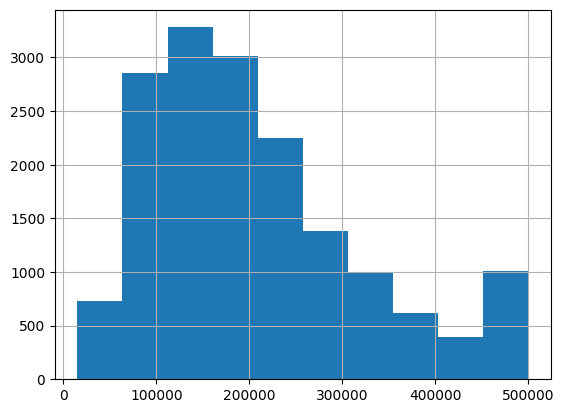

In [9]:
train.median_house_value.hist()

Testing set

In [10]:
test.head()

,Id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,0,-122.27,37.87,35.0,3218.0,1108.0,1675.0,1000.0,1.7464,NEAR BAY
1,1,-118.94,34.18,24.0,3689.0,585.0,1898.0,581.0,5.9224,<1H OCEAN
2,2,-119.75,36.77,32.0,1962.0,399.0,1005.0,392.0,2.6726,INLAND
3,3,-118.34,33.93,32.0,1254.0,399.0,1281.0,386.0,2.2976,<1H OCEAN
4,4,-119.00,35.36,35.0,1021.0,280.0,1258.0,239.0,1.7375,INLAND


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  4128 non-null   int64  
 1   longitude           4128 non-null   float64
 2   latitude            4128 non-null   float64
 3   housing_median_age  4128 non-null   float64
 4   total_rooms         4128 non-null   float64
 5   total_bedrooms      4089 non-null   float64
 6   population          4128 non-null   float64
 7   households          4128 non-null   float64
 8   median_income       4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 322.6+ KB


There are 4128 test instances. Again, there are some missing values in the `total_bedrooms` feature. Note that there's a feature, `Id`, that is not present in the training data set. You'll have to deal with that later. 

# Explore the data, feature engineering, prepare the data, explore models, fine-tune models, evaluate and validate

## 4. Prepare the data to better expose the underlying data patterns to machine learning algorithms

Before training different models we need to make sure the dataset clean and complete with no NaN values.

Convetrs ocean_proximity (training set) from string to numeric. Gives each category to a seperate feature. This is represented in binary.  
Using dummies from the pandas library. Dummies encodes categroical information and gives two possible values. (1 is true, 0 is false).

In [12]:
dfTrain = pd.concat([train.drop('ocean_proximity', axis=1), pd.get_dummies(train['ocean_proximity'])], axis=1)

Drop ISLAND under ocean_proximit, beause it does not exists in the test_data

In [13]:
dfTrain = dfTrain.drop('ISLAND', axis=1)

In [14]:
dfTrain

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,184000.0,0,0,1,0
1,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,172200.0,0,1,0,0
2,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,359900.0,1,0,0,0
3,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,258200.0,1,0,0,0
4,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,239100.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-117.92,33.83,52.0,1514.0,301.0,855.0,293.0,3.6042,166400.0,1,0,0,0
16508,-117.84,34.63,5.0,6739.0,1251.0,4614.0,1266.0,4.0020,115100.0,0,1,0,0
16509,-117.69,33.58,5.0,6678.0,1011.0,2877.0,982.0,7.5177,330000.0,1,0,0,0
16510,-117.30,34.10,49.0,60.0,11.0,76.0,13.0,2.5625,75000.0,0,1,0,0


Converts the ocean_proximity (testing_set) from text to binary numbers. Gives each category to a seperate feature. This is represented in binary. Dummies is used here aswell. 

In [15]:
dfTest = pd.concat([test.drop('ocean_proximity', axis=1), pd.get_dummies(test['ocean_proximity'])], axis=1)

In [16]:
dfTest = dfTest.drop(columns="Id")

In [17]:
dfTest

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.27,37.87,35.0,3218.0,1108.0,1675.0,1000.0,1.7464,0,0,1,0
1,-118.94,34.18,24.0,3689.0,585.0,1898.0,581.0,5.9224,1,0,0,0
2,-119.75,36.77,32.0,1962.0,399.0,1005.0,392.0,2.6726,0,1,0,0
3,-118.34,33.93,32.0,1254.0,399.0,1281.0,386.0,2.2976,1,0,0,0
4,-119.00,35.36,35.0,1021.0,280.0,1258.0,239.0,1.7375,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4123,-118.02,34.08,28.0,2769.0,631.0,2452.0,581.0,2.6071,0,1,0,0
4124,-118.16,34.14,41.0,3039.0,482.0,973.0,446.0,7.4817,1,0,0,0
4125,-119.48,37.00,16.0,2904.0,551.0,1467.0,509.0,3.1736,0,1,0,0
4126,-119.79,34.45,24.0,2746.0,433.0,1076.0,380.0,5.8635,0,0,0,1


We note that there are some missing values in the feature `total_bedrooms`. Note that there could be other features with missing values if "missing" is coded by another value than "n/a". This is something we'll have to deal with.

Filling the missing values in the training_set in total_bedrooms with mean.

In [18]:
TotalBedroomsMedian = dfTrain["total_bedrooms"].median()
dfTrain["total_bedrooms"].fillna(TotalBedroomsMedian, inplace=True)
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   <1H OCEAN           16512 non-null  uint8  
 10  INLAND              16512 non-null  uint8  
 11  NEAR BAY            16512 non-null  uint8  
 12  NEAR OCEAN          16512 non-null  uint8  
dtypes: float64(9), uint8(4)
memory usage: 1.2 MB


All columns now have equal length. 

Filling inn the missing values in the Testing_set in total_bedrooms with mean.

In [19]:
TotalBedroomsMedian = dfTest["total_bedrooms"].median()
dfTest["total_bedrooms"].fillna(TotalBedroomsMedian, inplace=True)
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4128 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   <1H OCEAN           4128 non-null   uint8  
 9   INLAND              4128 non-null   uint8  
 10  NEAR BAY            4128 non-null   uint8  
 11  NEAR OCEAN          4128 non-null   uint8  
dtypes: float64(8), uint8(4)
memory usage: 274.2 KB


No all coloums have equal lenght.

## 5. Explore many different models and short-list the best ones

#### Train_Test_Split


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = dfTrain.drop(['median_house_value'], axis=1)
y = train.median_house_value

In [22]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,0,0,1,0
1,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,0,1,0,0
2,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,1,0,0,0
3,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,1,0,0,0
4,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-117.92,33.83,52.0,1514.0,301.0,855.0,293.0,3.6042,1,0,0,0
16508,-117.84,34.63,5.0,6739.0,1251.0,4614.0,1266.0,4.0020,0,1,0,0
16509,-117.69,33.58,5.0,6678.0,1011.0,2877.0,982.0,7.5177,1,0,0,0
16510,-117.30,34.10,49.0,60.0,11.0,76.0,13.0,2.5625,0,1,0,0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.3, random_state=42)

In [24]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
12602,-118.36,33.83,35.0,1378.0,247.0,645.0,217.0,5.9143,1,0,0,0
6594,-122.09,37.70,33.0,4413.0,1107.0,2239.0,1051.0,2.9861,0,0,1,0
7732,-120.66,35.29,23.0,1932.0,487.0,1380.0,472.0,1.9647,0,0,0,1
7163,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,0,0,1,0
3131,-121.30,38.12,11.0,1792.0,252.0,767.0,263.0,7.6889,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-120.55,41.61,22.0,9047.0,1831.0,4276.0,1622.0,2.0802,0,1,0,0
11964,-122.22,40.18,13.0,3719.0,803.0,1754.0,764.0,2.3517,0,1,0,0
5390,-118.95,35.41,21.0,3999.0,727.0,1889.0,688.0,3.8750,0,1,0,0
860,-121.11,38.95,14.0,3888.0,890.0,1830.0,844.0,1.8238,0,1,0,0


In [25]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
14911,-122.33,37.92,26.0,3887.0,779.0,2512.0,740.0,2.2301,0,0,1,0
16468,-122.19,37.79,45.0,2718.0,451.0,1106.0,454.0,4.6563,0,0,1,0
3550,-117.62,34.07,15.0,4061.0,811.0,2884.0,734.0,3.3936,0,1,0,0
1547,-121.92,37.68,23.0,1655.0,223.0,706.0,219.0,7.2211,1,0,0,0
11356,-117.13,32.91,15.0,1450.0,266.0,747.0,290.0,3.6111,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7300,-121.04,37.66,11.0,1658.0,301.0,913.0,298.0,4.1705,0,1,0,0
14934,-118.21,34.10,47.0,5077.0,1271.0,3348.0,1106.0,3.0377,1,0,0,0
1255,-121.95,37.32,39.0,1164.0,199.0,619.0,231.0,4.6304,1,0,0,0
5020,-121.75,37.29,15.0,1486.0,310.0,455.0,296.0,4.3365,1,0,0,0


### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [27]:
logr = LogisticRegression()
logr.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
y_pred_logr = logr.predict(X_test)

In [29]:
mean_squared_error(y_test, y_pred_logr, squared=False)

240332.13949201268

#### DecisionTree

Decision Tree regression is used to predict data, and produce continius output by observing features and training the model in tree structure.

In [30]:
from sklearn.tree import DecisionTreeRegressor 



In [31]:
dtr = DecisionTreeRegressor(random_state=5)
dtr = dtr.fit(X_train, y_train)

In [32]:
y_pred_dtr = dtr.predict(X_test)


In [33]:
mean_squared_error(y_test, y_pred_dtr, squared=False)

70549.64323794996

This gave us a better result then when using logistic regression. By over 300%

## Grandient Boost.

Ensable is a combination of simple individual models that togheter create a more powerfull model. Boosting is a method for creating ensable. 

Gradient boosting minimizes the overall prediction error. By combining prevoius models and improving the previous iterations.


In [34]:
from sklearn.ensemble import GradientBoostingRegressor

In [35]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [36]:
y_pred_gbr = gb.predict(X_test)

In [37]:
mean_squared_error(y_test, y_pred_gbr, squared=False)

55000.265549736665

## 6. Fine-tune your models and combine them into a great soution

This gave us a better result. 

Going further with the gradient boosting model. We fine tune the model.
Giving it 
n_estimators is used to avoid overfitting. Can go from 1 to inf. default is 100

Max_depth limits the number of nodes in the tree.

Learnin_rate shrinks the contribution of each tree.

In [38]:
gb = GradientBoostingRegressor(n_estimators=4000, max_depth=4,learning_rate=0.04)
gb.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.04, max_depth=4, n_estimators=4000)

In [39]:
y_pred_gbr = gb.predict(X_test)

In [40]:
mean_squared_error(y_test, y_pred_gbr, squared=False)

48038.65789002803

## 7. Present your solution

### Going with the Gradient boost gives us the best results.
Now we use the full dataset. 

In [47]:
gb = GradientBoostingRegressor(n_estimators=8000, max_depth=4,learning_rate=0.04)

In [48]:
gb.fit(X,y)

GradientBoostingRegressor(learning_rate=0.04, max_depth=4, n_estimators=8000)

In [49]:
y_pred = gb.predict(dfTest)

In [50]:
submission = pd.DataFrame({'Id': test.Id, 'median_house_value': y_pred})

In [51]:
submission.head()

,Id,median_house_value
0,0,279687.950797
1,1,271063.752636
2,2,78857.595444
3,3,151484.299708
4,4,45127.144646


In [52]:
submission.to_csv('submission.csv', index=False)